# 1.Word vectors

강의에서 우리는
- One-hot encoding (Dense)
- Word Embeddings (Sparse)

에 대해 배웠습니다. 단어가 벡터로 변환되는 과정을 직접 확인해 봅시다!

## 1.1 Dense embedding - One-hot vector

One-hot vector는 내가 정의한 단어 사전 안에서, 특정 단어가 가지는 인덱스만 1로 표시하고 나머지 차원은 다 0으로 정의하는 임베딩 방법입니다. 단어가 1개인 사전, 3개인 사전, 5개인 사전을 만들고 각각의 one-hot vector 구성을 살펴보아요!

우선 직접 one_word_dict, three_word_dict, five_word_dict를 구성해 봅시다. 마음에 드는 단어를 각각의 리스트에 넣어 주세요! (이름은 dict로 되어있지만 이는 딕셔너리 자료형을 의미하는 것이 아닙니다! 리스트 안에 문자형 변수(단어)만 넣어 주세요.)

In [1]:
import numpy as np

one_word_dict = [] #각각 리스트 빈칸, 알아서 단어 개수에 맞춰 구성해보기
three_word_dict = []
five_word_dict = []

#사전 내의 단어마다 인덱스 할당 후, 인덱스에 맞춰 one-hot vector 구성하는 함수입니다.
def create_one_hot_vectors(word_dict):
    word_to_index = {word: idx for idx, word in enumerate(word_dict)}

    def one_hot_vector(word):
        vector = np.zeros(len(word_to_index))
        index = word_to_index[word]
        vector[index] = 1
        return vector

    one_hot_vectors = {word: one_hot_vector(word) for word in word_dict}
    return one_hot_vectors

#구성한 one-hot vector를 깔끔하게 프린트하기 위한 함수입니다.
def print_one_hot_vectors(word_dict_name, one_hot_vectors):
    print(f"\n{word_dict_name}")
    for word, vector in one_hot_vectors.items():
        print(f"Word: {word}, One-hot vector: {vector}")

word_dicts = {
    "단어 1개짜리 사전의 원핫벡터 구성": one_word_dict,
    "단어 3개짜리 사전의 원핫벡터 구성": three_word_dict,
    "단어 5개짜리 사전의 원핫벡터 구성": five_word_dict
}

for dict_name, word_dict in word_dicts.items():
    one_hot_vectors = create_one_hot_vectors(word_dict)
    print_one_hot_vectors(dict_name, one_hot_vectors)


단어 1개짜리 사전의 원핫벡터 구성

단어 3개짜리 사전의 원핫벡터 구성

단어 5개짜리 사전의 원핫벡터 구성


## 1.2 Sparse Embedding - Word2Vec

워드 임베딩을 생성하고, 학습하는 방법에는 몇 가지가 있습니다. 그 중 Word2Vec을 사용해 단어 임베딩을 만들고, 1.1의 Dense embedding과 비교해 봅시다!

우선 Word2Vec 구성 및 학습을 위해서는 문장을 토크나이즈 하는 과정이 필요합니다! 세상에는 여러 가지 tokenizer가 존재하지만, 오늘은 konlpy 패키지 안의 Okt를 사용해서 한국어 품사별로 문장의 요소들을 tokenize 해 봅시다!

In [2]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 24.0 MB/s eta 0:00:00


In [4]:
import gensim
from gensim.models import Word2Vec
from konlpy.tag import Okt
from gensim.models.word2vec import LineSentence

sentences = [
    '딥러닝은 정말 어려워',
    '어려워도 해야지 뭐',
    '인공지능 정말 어렵다',
    '인공지능은 수학과 밀접한 관련이 있다',
    '수학을 잘하는 사람은 물리도 잘할 가능성이 높다',
    '딥러닝은 인공지능의 한 분야이다',
    '딥러닝 알고리즘에는 여러 종류가 있다',
    '신경망은 딥러닝의 기본 구조이다',
    'CNN과 RNN은 딥러닝의 대표적인 모델이다',
    '딥러닝은 대량의 데이터를 필요로 한다',
    '딥러닝 모델은 학습에 많은 시간이 걸린다',
    'GPU는 딥러닝 학습을 가속화한다',
    '텐서플로우는 딥러닝에 많이 사용되는 라이브러리이다',
    '파이토치는 딥러닝 연구에 많이 사용된다',
    '오픈소스 라이브러리는 딥러닝 연구에 큰 도움이 된다',
    '딥러닝을 사용하면 이미지 인식이 가능하다',
    '자연어 처리에도 딥러닝이 사용된다',
    '딥러닝은 자율주행차에도 사용된다',
    '딥러닝 모델의 성능을 평가하는 방법은 다양하다',
    '딥러닝 모델의 하이퍼파라미터 튜닝은 중요하다',
    '딥러닝의 발전은 인공지능의 발전에 기여한다',
    '딥러닝과 머신러닝은 밀접한 관계가 있다',
    '머신러닝은 딥러닝의 기초가 된다',
    '딥러닝은 인간의 뇌를 모방한다',
    '딥러닝 연구는 계속해서 발전하고 있다'
]

# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
okt = Okt()
tokenized_data = []

for sentence in sentences:
    temp_X = okt.morphs(sentence, stem=True)
    temp_X = [word for word in temp_X if not word in stopwords]  # 불용어 제거
    tokenized_data.append(temp_X)  # 토큰화된 문장 추가

print(tokenized_data)

model = Word2Vec(tokenized_data, vector_size=100, window=5, min_count=1, workers=4)

word = "모델"
if word in model.wv:
    print(f"'{word}'의 word vector: {model.wv[word]}")
    print(f"{word}의 word vector 차원: {model.wv[word].shape}") #shape 빈칸
else:
    print(f"'{word}'는 사전에 존재하지 않습니다")

similar_words = model.wv.most_similar("모델")
print("모델과 유사한 단어들:")
for similar_word in similar_words:
    print(similar_word)

[['딥', '러닝', '정말', '어렵다'], ['어렵다', '뭐'], ['인공', '지능', '정말', '어렵다'], ['인공', '지능', '수학과', '밀접하다', '관련', '있다'], ['수학', '을', '사람', '물리', '가능성', '높다'], ['딥', '러닝', '인공', '지능', '분야', '이다'], ['딥', '러닝', '알고리즘', '에는', '여러', '종류', '있다'], ['신경망', '딥', '러닝', '기본', '구조', '이다'], ['CNN', 'RNN', '딥', '러닝', '대표', '적', '인', '모델', '이다'], ['딥', '러닝', '대량', '데이터', '필요', '로'], ['딥', '러닝', '모델', '학습', '많다', '시간', '걸리다'], ['GPU', '늘다', '딥', '러닝', '학습', '을', '가속', '화하다'], ['텐서', '플로우', '딥', '러닝', '많이', '사용', '되다', '라이브러리', '이다'], ['파', '이토', '치다', '딥', '러닝', '연구', '많이', '사용', '되다'], ['오픈소스', '라이브러리', '딥', '러닝', '연구', '크다', '도움', '되다'], ['딥', '러닝', '을', '사용', '이미지', '인식', '가능하다'], ['자연어', '처리', '에도', '딥', '러닝', '사용', '되다'], ['딥', '러닝', '자율', '주', '행차', '에도', '사용', '되다'], ['딥', '러닝', '모델', '성능', '을', '평가', '방법', '다양하다'], ['딥', '러닝', '모델', '하이퍼', '파라미터', '튜닝', '중요하다'], ['딥', '러닝', '발전', '인공', '지능', '발전', '기여', '다'], ['딥', '러닝', '머신', '러닝', '밀접하다', '관계', '있다'], ['머신', '러닝', '딥', '러닝', '기초', '되다'], ['딥', '러닝', '인간

# 2. Recurrent Models

강의에서 배운 Recurrent model 중, RNN의 아주 기본적인 구조를 직접 구현해 봅시다!
RNN의 핵심적인 특징은 아래와 같죠

- 이전 timestep에서의 output을 다음 timestep에서의 input을 처리할때도 고려함
- 한정적인 길이의 input에 대해서만 처리

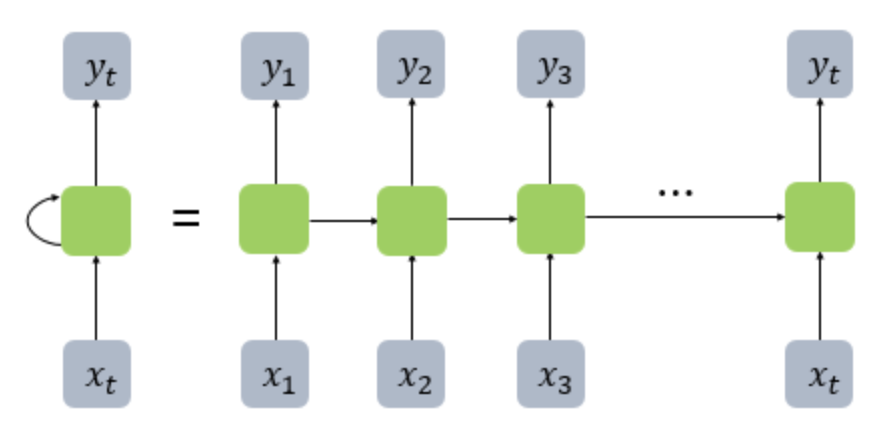


이 특징들과 위의 RNN architecture 사진을 참고하면서, 기본적인 RNN 구조를 구현해 봅시다.

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

sentences = ["i like deeplearning", "i love aiku", "i hate mathematics", "you like science", "you love physics", "you hate mathematics"]
dtype = torch.float

word_list = list(set(" ".join(sentences).split()))
word_dict = {##빈칸##: ##빈칸## for i, w in enumerate(word_list)} #단어:인덱스 형태로, 단어-인덱스 매핑이 된 우리만의 단어 사전을 구성해 봅시다.
number_dict = {##빈칸##: ##빈칸## for i, w in enumerate(word_list)} #반대로 인덱스:단어 구성으로, 인덱스를 키로 하여 단어를 찾는 사전을 구성해 봅시다.
n_class = ##빈칸## #n_class의 의미는 우리가 사용할 단어 사전 안의 고유한 단어의 개수입니다. 뭐가 들어가야 할까요?

tokenize 단위를 명확하게 하기 위해, 예시 문장을 3단어로 구성된 영어 문장으로 정했습니다. 방금 엄청난 힌트를 드렸는데요, 예시 문장의 sequence length와 관련지어 생각해 봅시다!

$n_{\text{steps}}$ = ***마지막 단어를 예측하기 위해 사용되는 시퀀스의 길이***

라고 할 때, $n_{\text{steps}}$ 는 우리의 예제에서 몇이 될까요?

그리고, RNN은 recurrent model입니다. 즉, 자기 자신의 구조를 재귀적으로 반복한다는 의미이기도 한데요!

빈칸에 대한 한 가지 힌트를 드리자면, torch.nn에는 RNN 모듈이 선언되어 있습니다!
nn.RNN을 선언하면 RNN 모듈을 불러올 수 있어요. 그렇다면 빈칸을 어떻게 채워야 할까요!

+참고) torch에서 제공하는 RNN 모듈은 아래와 같이 구성되어 있습니다.

```
def forward(x, h_0=None):
    if batch_first:
        x = x.transpose(0, 1)
    seq_len, batch_size, _ = x.size()
    if h_0 is None:
        h_0 = torch.zeros(num_layers, batch_size, hidden_size)
    h_t_minus_1 = h_0
    h_t = h_0
    output = []
    for t in range(seq_len):
        for layer in range(num_layers):
            h_t[layer] = torch.tanh(
                x[t] @ weight_ih[layer].T
                + bias_ih[layer]
                + h_t_minus_1[layer] @ weight_hh[layer].T
                + bias_hh[layer]
            )
        output.append(h_t[-1])
        h_t_minus_1 = h_t
    output = torch.stack(output)
    if batch_first:
        output = output.transpose(0, 1)
    return output, h_t
```

강의에서 설명드렸듯 activation function은 여러 가지를 써도 되지만.. RNN은 주로 tanh를 쓴답니다.

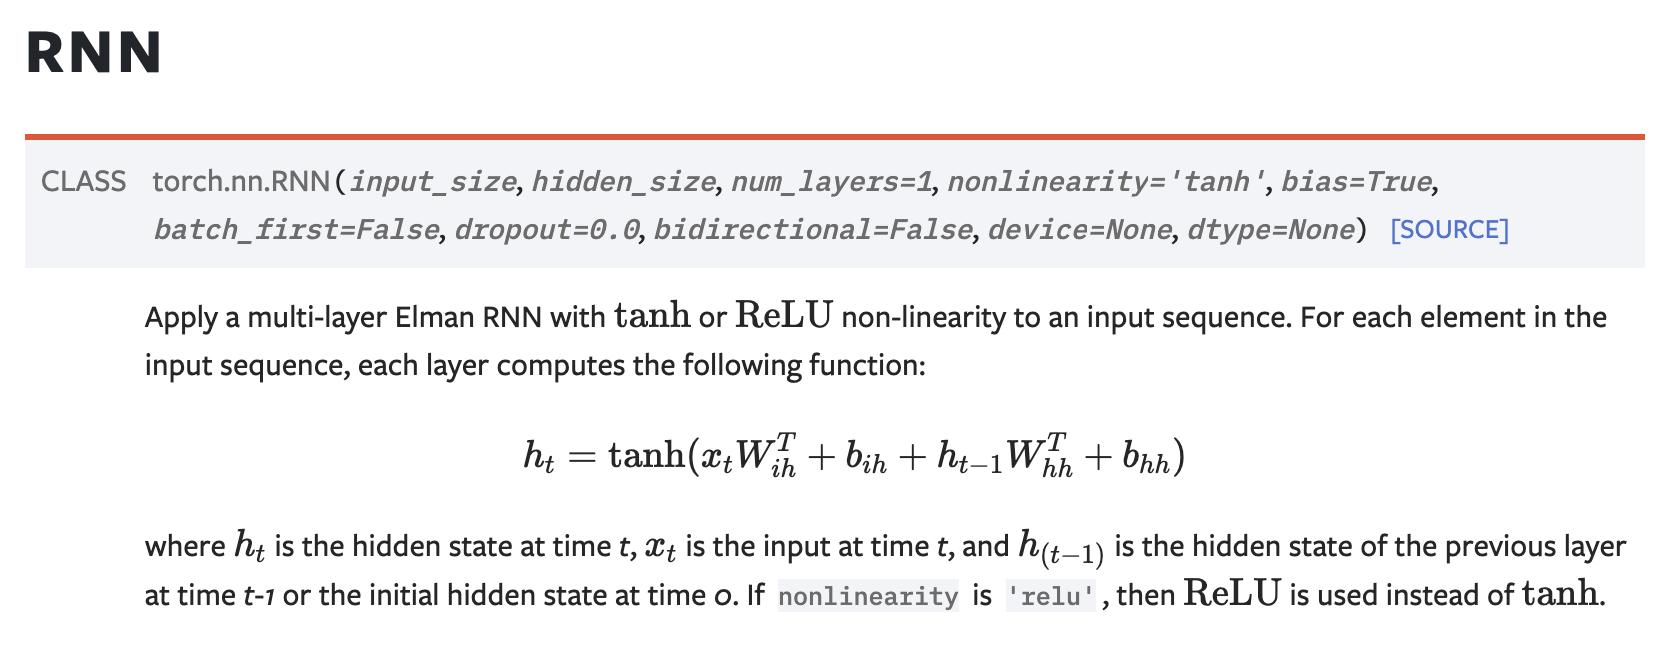

In [ ]:
batch_size = len(sentences)
n_step = ##빈칸##
n_hidden = 5 ###문제! n_hidden의 의미: (문제에 대한 답을 주석으로 적어주세요)

def make_batch(sentences):
  input_batch = []
  target_batch = []

  for sen in sentences:
    word = sen.split()
    input = [word_dict[n] for n in word[:-1]]
    target = word_dict[##빈칸##]

    input_batch.append(np.eye(n_class)[input])  # 참고) np.eye는 identity matrix 생성에 사용되는 함수입니다
    target_batch.append(target)

  return input_batch, target_batch

input_batch, target_batch = make_batch(sentences)
input_batch = torch.tensor(input_batch, dtype=torch.float32, requires_grad=True)
target_batch = torch.tensor(target_batch, dtype=torch.int64)

class AikuRNN(nn.Module):
  def __init__(self):
    super(AikuRNN, self).__init__()

    self.rnn = ##빈칸##(input_size=n_class, hidden_size=n_hidden, dropout=0.3)
    self.W = nn.Parameter(torch.randn([##빈칸##, n_class]).type(dtype))
    self.b = nn.Parameter(torch.randn([n_class]).type(dtype))
    self.Softmax = nn.Softmax(dim=1)

  def forward(self, hidden, X):
    X = X.transpose(0, 1)
    outputs, hidden = self.rnn(X, hidden)
    outputs = outputs[-1]
    model = torch.mm(outputs, self.W) + self.b
    return model


hyperparameter를 선언했으니, 선언한 모델을 훈련해 봅시다.

RNN의 initial hidden state는 보통 0으로 초기화합니다. torch에 익숙해지기 위해 직접 initial hidden state를 0으로 초기화하는 작업도 해 봅시다.

loss는 CrossEntropy를 사용할 예정입니다. 이것도 직접 선언해 봅시다!

학습 이후에는, 학습한 모델의 최종 파라미터를 바탕으로 input 문장들에 대해서 **마지막 시퀀스에 올 단어를 예측**하는 작업을 수행할 것입니다. 아래 사항들을 고려해서 학습 및 예측을 진행해 주세요!

- 우리는 '마지막 시퀀스의 단어'를 예측합니다. sequential model의 의미를 되새겨 봅시다!
- predicted_words에서 predict 텐서를 간단하고 깔끔하게 표현해 봅시다.

$predict$ = (batch size, 배치 안의 각 문장들에 대해 예측된 단어의 인덱스) 로 이루어져 있습니다.

그렇다면 '배치 안의 각 문장들에 대해 예측된 단어의 인덱스'는 1차원이겠죠?

ex) predict = torch.size([6,1]) < 배치 당 6문장 처리


```
tensor([[3],
         [4],
         [2],
         [1],
         [2],
         [4]])

shape: torch.Size([6, 1])
```

torch에서 **어떤 함수**를 쓰면, ***텐서에서 크기가 1인 차원을 제거***해줍니다. 이 함수를 써준 뒤의 predict 텐서는 아래와 같아질 것입니다.

```
tensor([3, 4, 2, 1, 2, 4])
shape: torch.Size([6])
```

이렇게 표현하면 각 문장들에 대해 예측된 인덱스를 1차원의 간단한 리스트 형태로 나타낼 수 있습니다. 그러면 number_dict에서 리스트의 요소들을 인덱스로 삼아서, 해당하는 단어가 무엇인지 가져오기 훨씬 편합니다!

정리하자면, 단어 딕셔너리에서 텐서 내에 인덱스에 해당하는 '실제 단어'를 직관적으로 가져오게 하기 위해 우리는 torch의 어떤 함수를 사용했습니다. 이 힌트를 참고해서 아래 빈칸을 채워 주세요!


In [ ]:
model = AikuRNN()
criterion = ##빈칸##
optimizer = optim.Adam(model.parameters(), lr=0.01)

for epoch in range(1000):
  hidden = ##빈칸##(1, batch_size, n_hidden, requires_grad=True)
  output = model(hidden, input_batch)
  loss = criterion(output, target_batch)

  if (epoch + 1) % 100 == 0:
    print('Epoch:', '%04d' % (epoch + 1), 'loss =', '{:.6f}'.format(loss))

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

hidden = torch.zeros(1, batch_size, n_hidden, requires_grad=True)
predict = model(hidden, input_batch).data.max(1, keepdim=True)[1]
input_sequences = [sen.split()[:##빈칸##] for sen in sentences]
predicted_words = [number_dict[n.item()] for n in predict.##빈칸##]

for input_seq, predicted_word in zip(input_sequences, predicted_words):
    print(f"Input: {' '.join(input_seq)} -> Predicted: {predicted_word}")

수고하셨습니다! 직접 기본적인 RNN 구조를 만들어 봤어요. 와!
실습은 텍스트 데이터로 진행했지만, recurrent model은 시퀀스가 존재하는 대부분의 데이터에 모두 활용될 수 있습니다. 오늘 배운 내용 중 LSTM은 왜 실습에 없는지 궁금하시죠? 그것은 바로 과제에 있기 때문입니다!

NLP를 접한다면 한 번쯤 보게될 대중적인 데이터셋인 '네이버 영화 리뷰 감성분석' 데이터셋을 활용하여 라벨 분류를 수행하는 과제가 나갈 예정입니다.

**라벨 예측** 이라는 task는 one-to-one, many-to-one, many-to-many 구조 중 어느 쪽에 해당할까요? 입력과 출력의 관계를 생각하면서 과제를 해주세요!

긴 시간 집중해주셔서 감사합니다.